In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[14]:


import pandas as pd
# Define the file path provided by the user
file_path = r'~/Desktop/files/Microplastic.xlsx'

# Load the Excel file again to check the sheets and prepare for merging
xls = pd.ExcelFile(file_path)

# List all sheet names to understand the structure for further operations
sheet_names = xls.sheet_names
sheet_names

['Table of Contents',
 'B.1. Chemical list key',
 'B.1. Chemicals list',
 'B.2. Health outcomes list',
 'B.3. Countries list']

In [2]:
# In[15]:

# Read the content of the Excel file to check the sheets available
xls = pd.ExcelFile(file_path)

# Display the sheet names
xls.sheet_names

['Table of Contents',
 'B.1. Chemical list key',
 'B.1. Chemicals list',
 'B.2. Health outcomes list',
 'B.3. Countries list']

In [3]:
# In[16]:

# Read the relevant sheets
chemical_list_df = pd.read_excel(file_path, sheet_name='B.1. Chemicals list')
health_outcomes_df = pd.read_excel(file_path, sheet_name='B.2. Health outcomes list')

# Clean the 'Chemical List' dataframe
chemical_list_cleaned = chemical_list_df[['Chemical class', 'Chemical name', 'CAS number', 'Function for SEM inclusion', 'Source', 'Found/Not found','General function*','Sector of use*','Hazard rating*']].dropna()

# Clean the 'Health Outcomes List' dataframe (after renaming columns appropriately)
health_outcomes_cleaned = health_outcomes_df.rename(columns={
    'Excel Table B.2. List of health outcome measures showing their ICD classifications, corresponding search terms, and the health outcome measure extracted and used for grouping in this systematic evidence map.': 'Health outcome',
    'Unnamed: 6': 'Group'
})[['Health outcome', 'Group']].dropna()

# Merging the chemical list and health outcomes using 'concat'
merged_data = pd.concat([chemical_list_cleaned, health_outcomes_cleaned], axis=1)

# Display the first few rows of the merged data
print(merged_data.head())

   Chemical class                                      Chemical name  \
0      Bisphenols  1,3-dibromo-5-[2-[3,5-dibromo-4-(2,3-dibromo-2...   
1      Bisphenols  1,3-dibromo-5-[2-[3,5-dibromo-4-(2,3-dibromopr...   
2      Bisphenols  2,6-dibromo-4-[2-(3,5-dibromo-4-hydroxyphenyl)...   
26           OPEs  (3-diphenoxyphosphoryloxyphenyl) diphenyl phos...   
30           OPEs  2-[diethoxyphosphorylmethyl(2-hydroxyethyl)ami...   

      CAS number Function for SEM inclusion  \
0   "97416-84-7"            Flame retardant   
1   "21850-44-2"            Flame retardant   
2      "79-94-7"            Flame retardant   
26  "57583-54-7"            Flame retardant   
30   "2781-11-5"            Flame retardant   

                                               Source Found/Not found  \
0                          ECHA - EU Chemicals Agency       not found   
1                          ECHA - EU Chemicals Agency       not found   
2                          ECHA - EU Chemicals Agency           f

In [4]:
# In[17]:

# Check for any missing, NaN, or empty values in the merged dataset
missing_values = merged_data.isnull().sum()

# Display the count of missing values in each column
print(missing_values)

Chemical class                955
Chemical name                 955
CAS number                    955
Function for SEM inclusion    955
Source                        955
Found/Not found               955
General function*             955
Sector of use*                955
Hazard rating*                955
Health outcome                 36
Group                          36
dtype: int64


In [5]:
# In[18]:

# Fill missing values with the mode (most frequent value) for each column
merged_data_filled = merged_data.apply(lambda x: x.fillna(x.mode()[0]))

# Display the first few rows of the filled dataset to verify
print(merged_data_filled.head())

   Chemical class                                      Chemical name  \
0      Bisphenols  1,3-dibromo-5-[2-[3,5-dibromo-4-(2,3-dibromo-2...   
1      Bisphenols  1,3-dibromo-5-[2-[3,5-dibromo-4-(2,3-dibromopr...   
2      Bisphenols  2,6-dibromo-4-[2-(3,5-dibromo-4-hydroxyphenyl)...   
26           OPEs  (3-diphenoxyphosphoryloxyphenyl) diphenyl phos...   
30           OPEs  2-[diethoxyphosphorylmethyl(2-hydroxyethyl)ami...   

      CAS number Function for SEM inclusion  \
0   "97416-84-7"            Flame retardant   
1   "21850-44-2"            Flame retardant   
2      "79-94-7"            Flame retardant   
26  "57583-54-7"            Flame retardant   
30   "2781-11-5"            Flame retardant   

                                               Source Found/Not found  \
0                          ECHA - EU Chemicals Agency       not found   
1                          ECHA - EU Chemicals Agency       not found   
2                          ECHA - EU Chemicals Agency           f

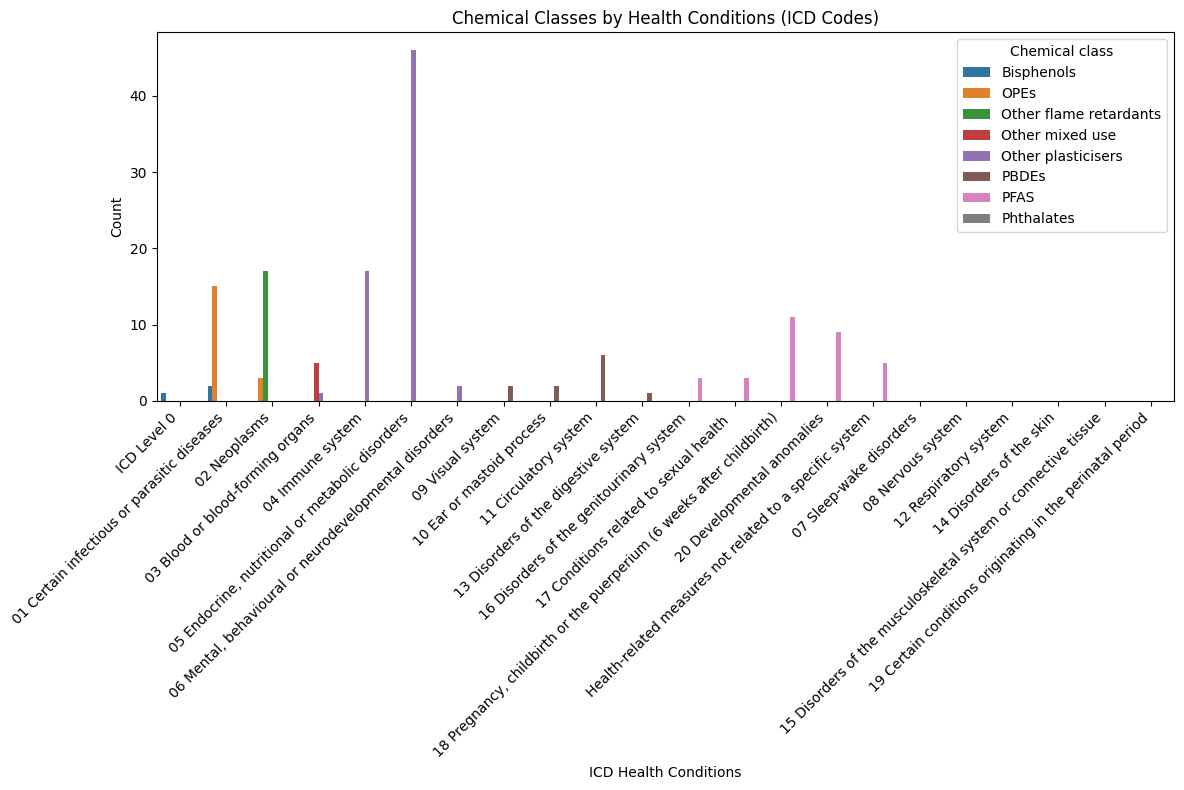

In [6]:
# In[19]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot (bar chart) to visualize the number of occurrences of each chemical class by ICD code
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_data, x='Health outcome', hue='Chemical class')
plt.title('Chemical Classes by Health Conditions (ICD Codes)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('ICD Health Conditions')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

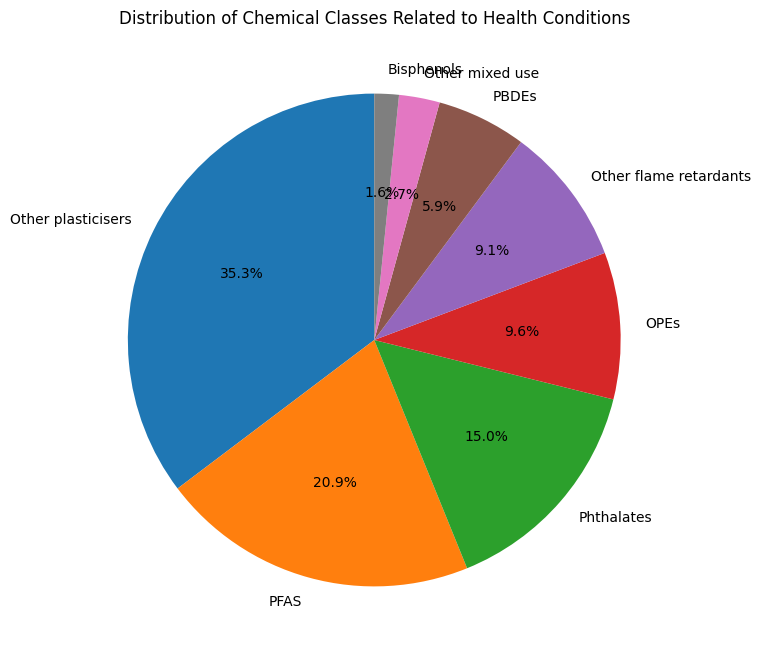

In [7]:
# In[20]:

# Plot pie chart for chemical class distribution
plt.figure(figsize=(8, 8))
merged_data['Chemical class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Chemical Classes Related to Health Conditions")
plt.ylabel('')
plt.show()

In [8]:
# In[21]:

##
def categorize_risk(hazard_rating):  
    if hazard_rating == 'high':  
        return 'high risk'  
    elif hazard_rating == 'low':  
        return 'low risk'  
    elif hazard_rating == 'medium':  
        return 'medium risk'  
    elif hazard_rating == 'No data available':  
        return 'unknown risk'  
    else:  
        return 'unknown risk'  # Optional: Handle unexpected cases  

# Apply the function and create a new column  
merged_data['Risk Category'] = merged_data['Hazard rating*'].apply(categorize_risk) 
##

# Display the first few rows to verify
print(merged_data[['Chemical name', 'Risk Category']].head())

                                        Chemical name Risk Category
0   1,3-dibromo-5-[2-[3,5-dibromo-4-(2,3-dibromo-2...  unknown risk
1   1,3-dibromo-5-[2-[3,5-dibromo-4-(2,3-dibromopr...  unknown risk
2   2,6-dibromo-4-[2-(3,5-dibromo-4-hydroxyphenyl)...     high risk
26  (3-diphenoxyphosphoryloxyphenyl) diphenyl phos...  unknown risk
30  2-[diethoxyphosphorylmethyl(2-hydroxyethyl)ami...  unknown risk


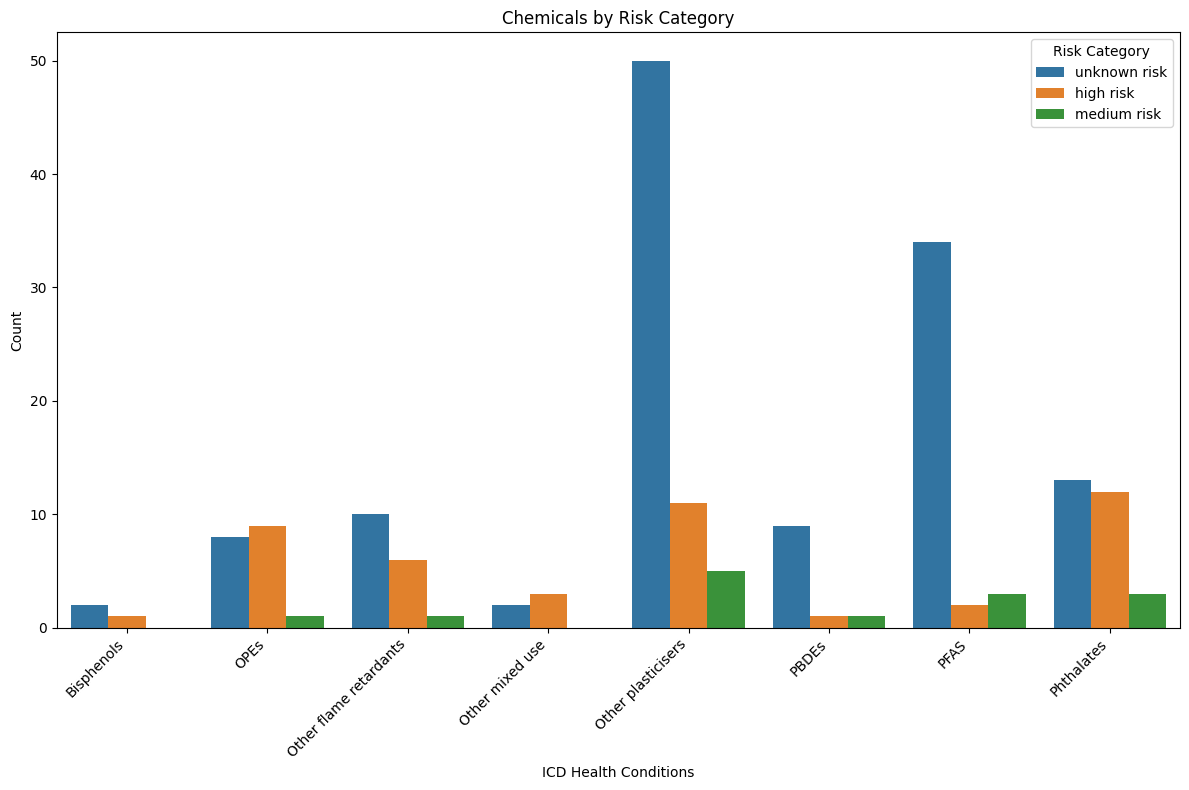

In [9]:
# In[22]:

# Create a bar chart of chemicals by risk category and health outcomes
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_data, x='Chemical class', hue='Risk Category')
plt.title("Chemicals by Risk Category")
plt.xticks(rotation=45, ha='right')
plt.xlabel('ICD Health Conditions')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

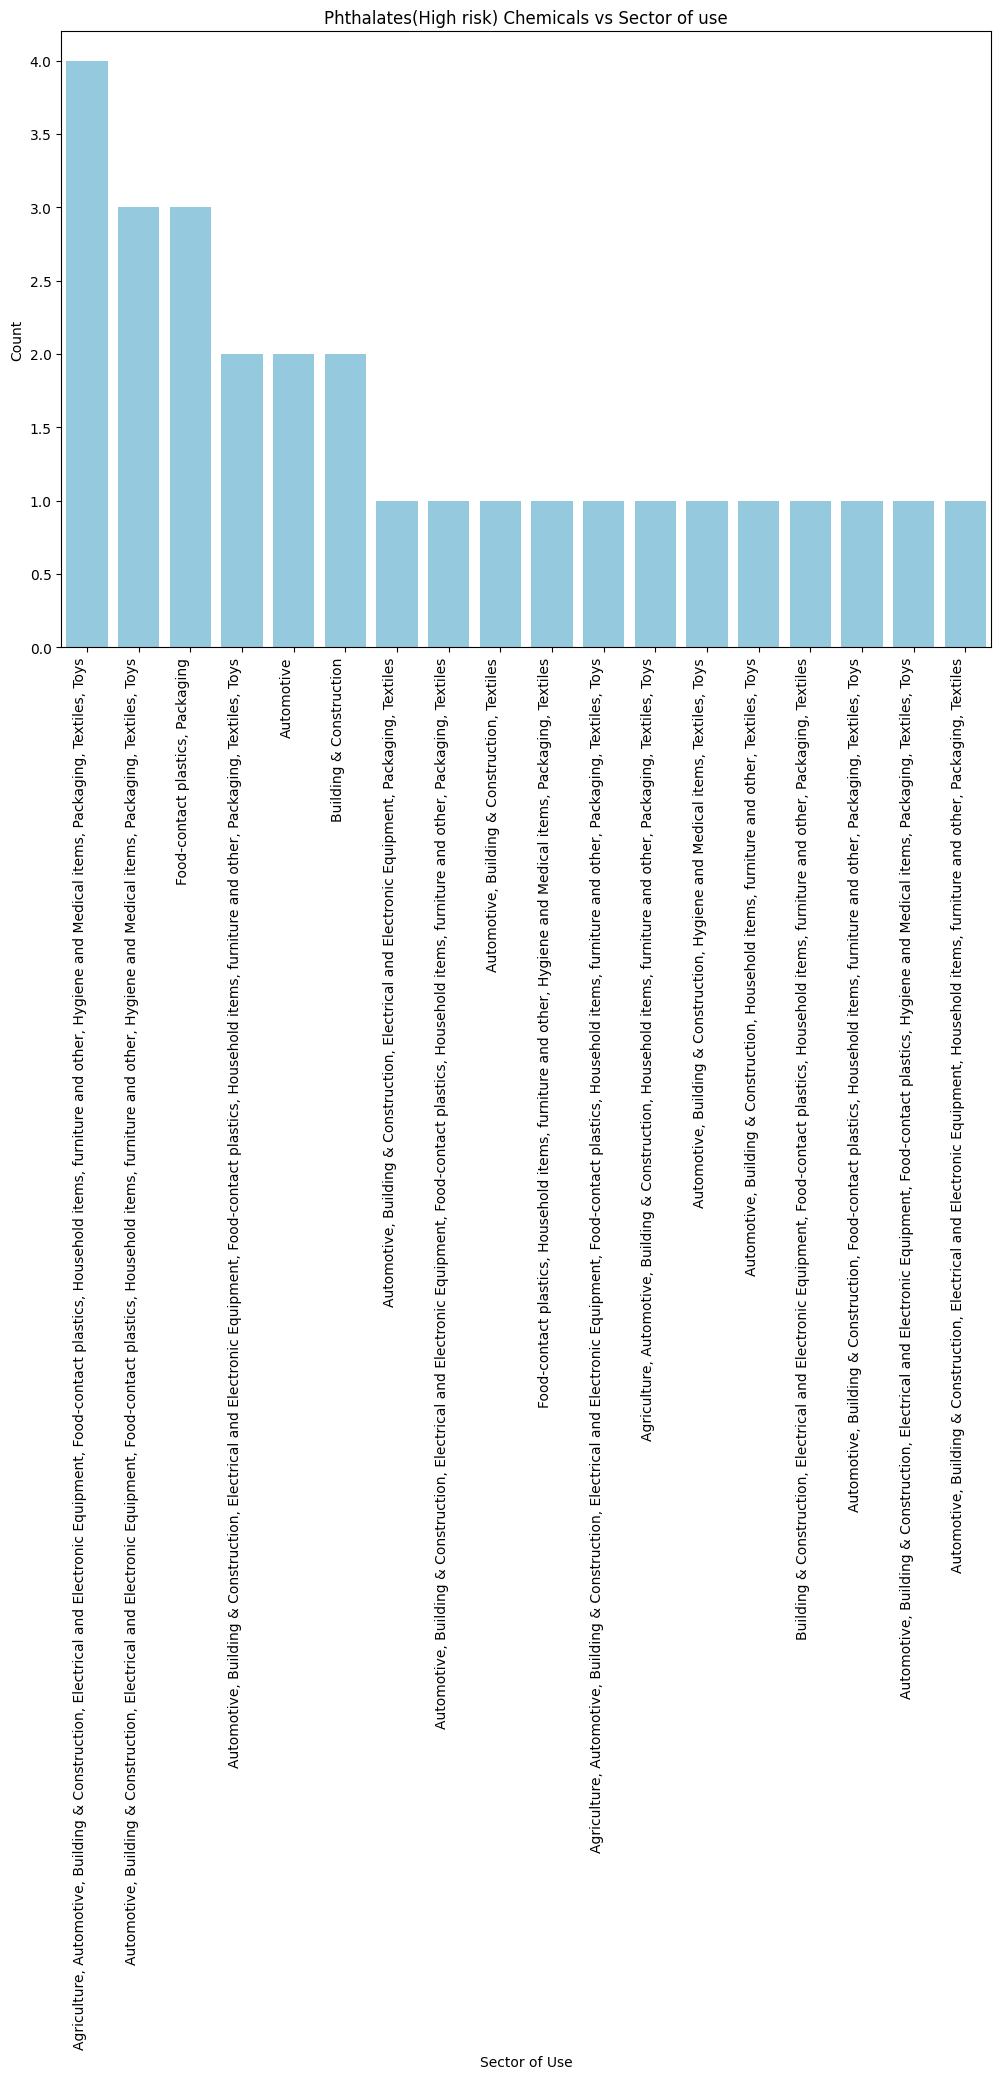

In [18]:
# chemical class with the highest risk effect

Phthalates = merged_data[merged_data['Chemical class'] == 'Phthalates']

# Create a bar chart of phthalates chemicals by sector of use
# Calculate the counts of each sector  
sector_counts = Phthalates['Sector of use*'].value_counts().index.tolist()  
plt.figure(figsize=(12, 8))
sns.countplot(data=Phthalates, x='Sector of use*', color='skyblue', order=sector_counts)
plt.title("Phthalates(High risk) Chemicals vs Sector of use")
plt.xticks(rotation=90, ha='right')
plt.xlabel('Sector of Use')
plt.ylabel('Count')
plt.show()

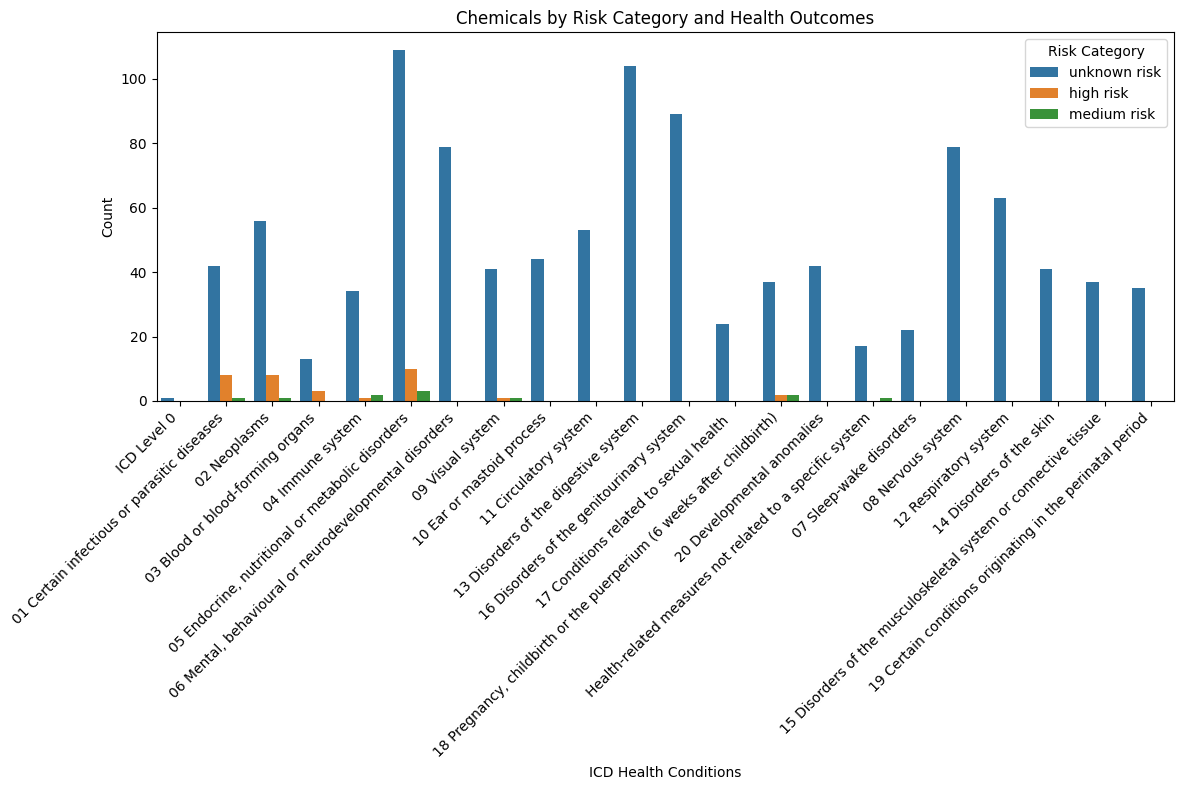

In [ ]:
# In[22]:

# Create a bar chart of chemicals by risk category and health outcomes
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_data, x='Health outcome', hue='Risk Category')
plt.title("Chemicals by Risk Category and Health Outcomes")
plt.xticks(rotation=45, ha='right')
plt.xlabel('ICD Health Conditions')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

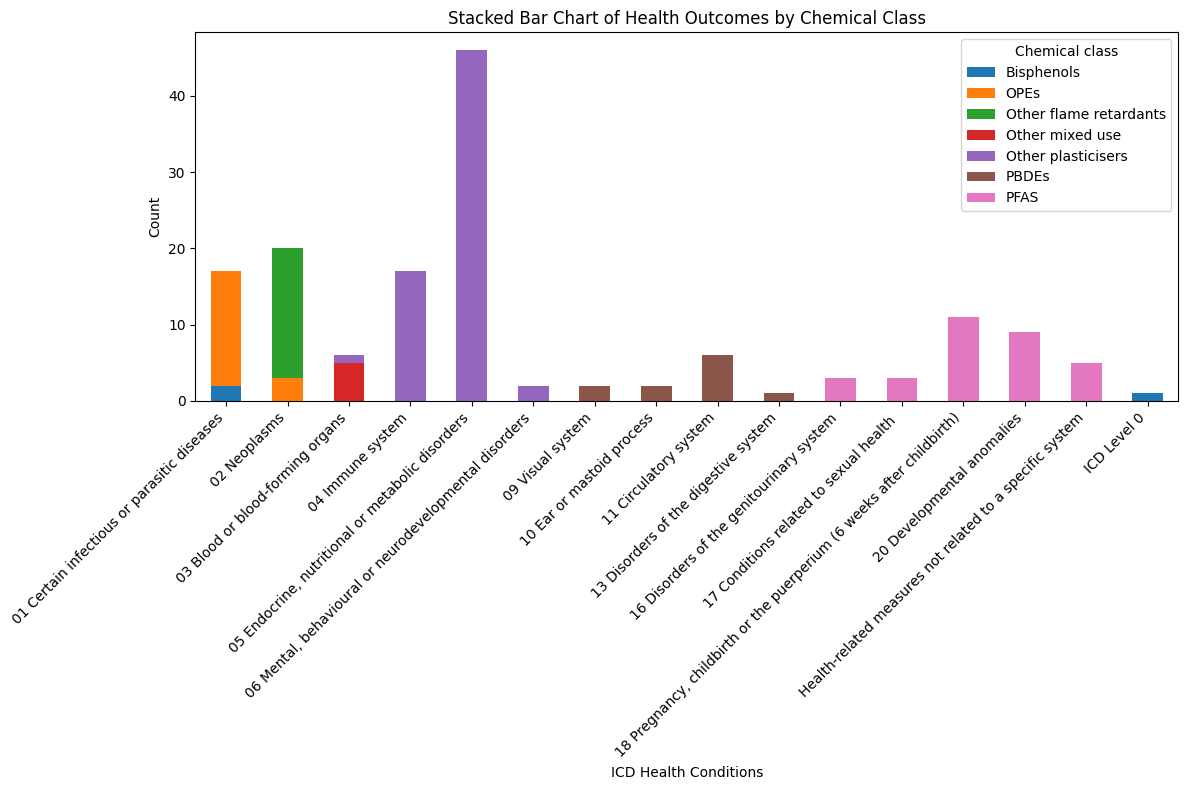

In [ ]:
# In[23]:

# Group the data by 'Health outcome' and 'Chemical class'
grouped_data = merged_data.groupby(['Health outcome', 'Chemical class']).size().unstack(fill_value=0)

# Plot a stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Stacked Bar Chart of Health Outcomes by Chemical Class")
plt.xlabel('ICD Health Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# In[45]:

print(merged_data.columns)

Index(['Chemical class', 'Chemical name', 'CAS number',
       'Function for SEM inclusion', 'Source', 'Found/Not found',
       'General function*', 'Sector of use*', 'Hazard rating*',
       'Health outcome', 'Group', 'Risk Category'],
      dtype='object')


In [ ]:
# In[46]:

# Create a binary target variable based on 'Risk Category'
# Assuming 'High Risk' indicates responsibility for health issues
merged_data['Responsible'] = merged_data['Risk Category'].apply(lambda x: 1 if x == 'high risk' else 0)

# Encode the features

from sklearn.preprocessing import LabelEncoder

# Instances for LabelEncoder
le_chemical = LabelEncoder()
le_health = LabelEncoder()

# Fit and transform the features
merged_data['Chemical class_encoded'] = le_chemical.fit_transform(merged_data['Chemical class'])
merged_data['Health outcome_encoded'] = le_health.fit_transform(merged_data['Health outcome'])

# Prepare features (X) and target (y)
X = merged_data[['Chemical class_encoded', 'Health outcome_encoded']]  # Features
y = merged_data['Responsible']  # Target variable: whether the chemical is responsible

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model (or any other model you prefer)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Print detailed classification report
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       223
           1       0.50      0.17      0.25         6

    accuracy                           0.97       229
   macro avg       0.74      0.58      0.62       229
weighted avg       0.97      0.97      0.97       229



In [ ]:
# In[51]:

print(merged_data['Risk Category'].value_counts())
# or check other columns that could serve as a target

Risk Category
unknown risk    1083
high risk         45
medium risk       14
Name: count, dtype: int64


In [ ]:
# In[53]:

from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train model
knn_model.fit(X_train, y_train)

# Predict
y_pred = knn_model.predict(X_test)

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       223
           1       0.33      0.33      0.33         6

    accuracy                           0.97       229
   macro avg       0.66      0.66      0.66       229
weighted avg       0.97      0.97      0.97       229



In [ ]:
# In[54]:

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train model
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       223
           1       0.00      0.00      0.00         6

    accuracy                           0.97       229
   macro avg       0.49      0.50      0.49       229
weighted avg       0.95      0.97      0.96       229

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       223
           1       0.00      0.00      0.00         6

    accuracy                           0.97       229
   macro avg       0.49      0.50      0.49       229
weighted avg       0.95      0.97      0.96       229

